# Heart Disease Analysis

This dataset is from the <a href = "https://archive.ics.uci.edu/ml/index.php">UCI Machine Learning Repository</a>, courtesy of: 
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D. 

This dataset measures the presence of heart disease in 303 patients and was donated in 1988. The original study had 76 attributes, but this experiment will use a subset of 14. The following attributes are:

 * age : the age of the patient  
 * sex : the sex of the patient  
     * 1 : male
     * 0 : female
 * cp : chest pain type 
     * 0 : asymptomatic
     * 1 : typical angina  
     * 2 : atypical angina  
     * 3 : non-anginal pain  
 * trestbps : resting blood pressure (in mm Hg)  
 * chol : cholestoral in mg/dl
 * fbs : (fasting blood sugar > 120 mg/dl)
     * 1 : true
     * 0 : false
 * restecg : resting electrocardiographic results  
     * 0 : showing probable or definite left ventricular hypertrophy by Estes’ criteria
     * 1 : normal
     * 2 : having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
 * thalach : maximum heart rate achieved  
 * exang: exercise induced angina
     * 1 : yes
     * 0 : no
 * oldpeak : ST depression induced by exercise relative to rest
 * slope : the slope of the peak exercise ST segment
     * 0 : downward-sloping
     * 1 : flat
     * 2 : upward sloping
 * ca : number of major vessels (0-3)  
 * thal : a blood disorder called thalassemia
     * 1 : fixed defect (no blood flow in some part of the heart)
     * 2 : normal blood flow
     * 3 : reversible defect (a blood flow is observed but it is not normal)
 * condition : heart disease present
     * 1 : yes
     * 0 : no

## First Analysis

In [1]:
# ol' reliable
import pandas as pd
import numpy as np

In [2]:
heart = pd.read_csv('heart.csv')

In [3]:
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
round(heart.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.37,9.08,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.68,0.47,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.97,1.03,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.62,17.54,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.26,51.83,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.15,0.36,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.53,0.53,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.65,22.91,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.33,0.47,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.04,1.16,0.0,0.0,0.8,1.6,6.2


In [5]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


| categorical attributes | continuous attributes | target attribute |
| :- | :- | :- |
 | sex  | age | output |
 | exng  | trtbps |
 | caa  | chol |
 | cp   |thalachh |
 | fbs  |oldpeak |
 | restecg  
 | slp  
 | thall

We have no missing data, which is great! We now visualize our attributes to look for any patterns or correlations.

## Visualizations

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sns.set(rc={"figure.figsize":(12, 10)})
sns.set_style('dark')

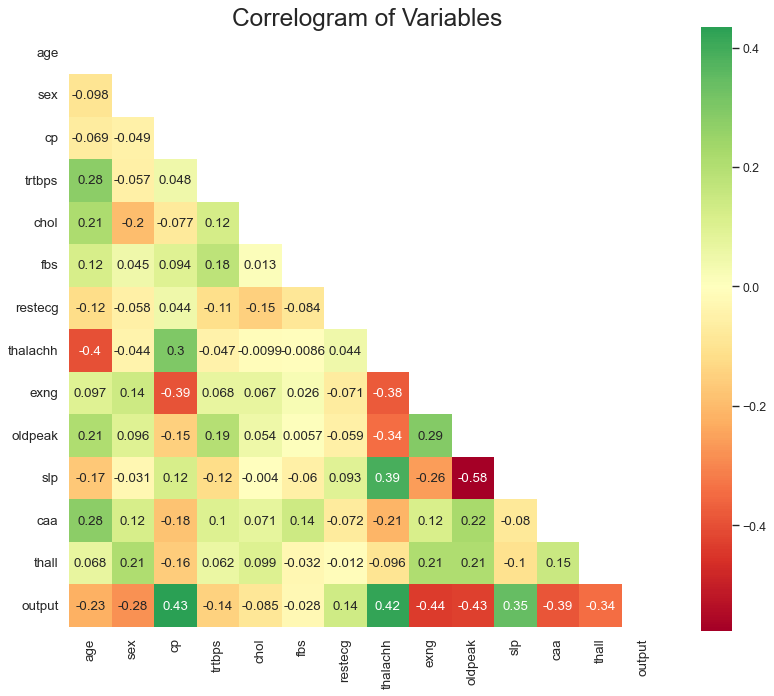

In [8]:
corr = heart.corr()
matrix = np.triu(np.ones_like(corr))

with sns.axes_style("white"):
    plt.figure(figsize = (12,10), dpi = 80)
    sns.heatmap(corr, 
                mask = matrix,
                cmap = 'RdYlGn',
                center = 0, 
                annot = True,
                square = True)

plt.title('Correlogram of Variables', fontsize = 22)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

Our attributes do not appear to influence each other, with the most influence being between 'oldpeak' and 'slp', so there is no issue with colinearity. If we look at correlation between all of the attributes and 'output', we notice that most have a correlation between 0.25 and 0.45. 'trtbps'and 'restecg' have low correlation to 'output', and  'chol' and 'fbs' have almost no correlation. Let's now graph the distribtions of our attributes by heart disease presence.

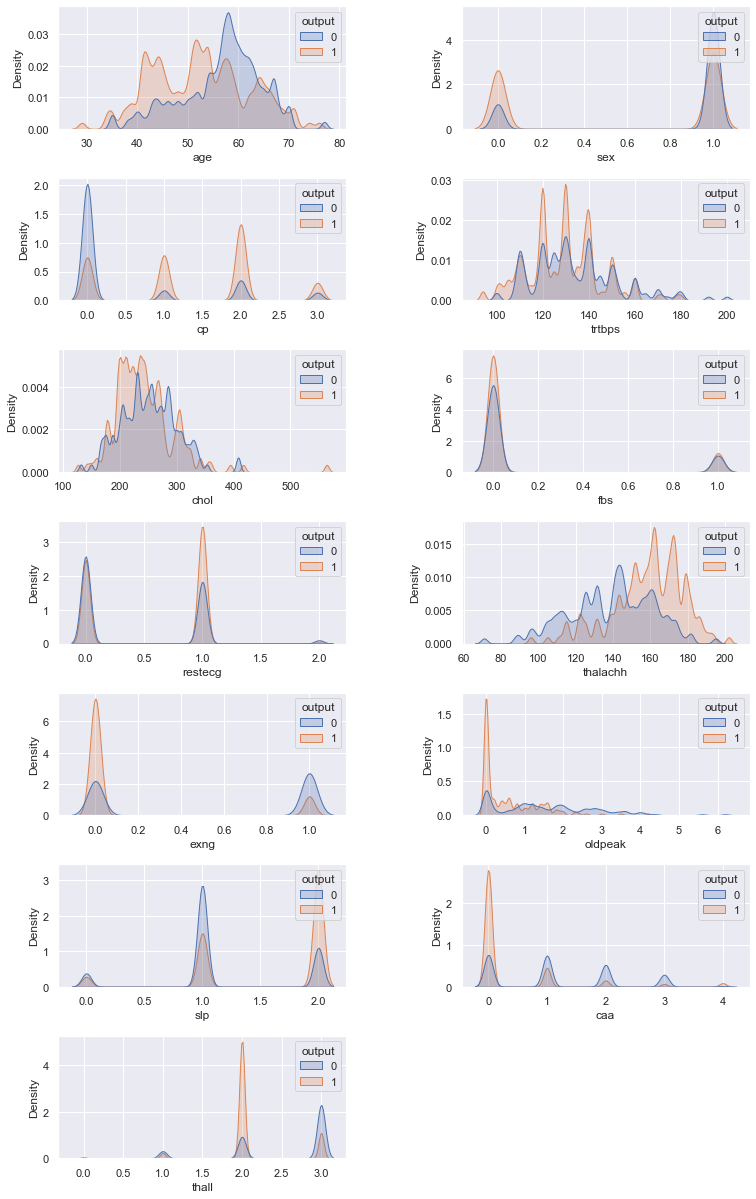

In [9]:
sns.set(rc = {'figure.figsize' : (12, 20)})

for i in range(1, 14):
    plt.subplot(7, 2, i)
    sns.kdeplot(data = heart, 
                x = heart.columns[i - 1],
                shade = True, 
                hue = 'output',
                bw_adjust = 0.2)
    plt.xlabel(heart.columns[i - 1])

plt.subplots_adjust(left = 0.2,
                    bottom = 0.2, 
                    right = 1, 
                    top = 1, 
                    wspace = 0.4, 
                    hspace = 0.4)
plt.show()

Keep in mind that the graphs with smooth curves represent categorical attributes, because they peak at 0s, 1s, and so on. A few observations:
 * most of the patients are around 60 years old
 * around 70% of the patients are male, but the distribtion of heart disease presence is almost equally distributed
 * most patients without heart disease reported no chest pain, while those with heart disease more likely experienced anginal chest pain.
 * 'chol' and 'fbs' have little influence on heart disease presence.
 * patients that did not report exercise enduced engina were far more likely to experience heart disease.
 * patients with an upward sloping exercise ST graph were far more likely to experience heart disease.

## Dataset Preparation

In [10]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
heart.drop(['trtbps', 'chol','fbs', 'restecg'], axis = 1, inplace = True)

I have chosen to drop the above attributes to prevent overfitting. (Note: I actually ran my models several times with these attributes included, and their exclusion produced the best results. This work is not included in the final model.)

In [12]:
X = heart.iloc[:, : -1]
y = heart.iloc[:, -1]

# one-hot-vector encoding for the categorical attributes
cat_cols = ['sex', 'cp', 'exng', 'slp', 'caa', 'thall']
# 'fbs', 'restecg',
X = pd.get_dummies(data = X, columns = cat_cols, drop_first = True)

In [13]:
# splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# normalizing the continuous variables. I chose to use a standard scale.
con_cols = ['age', 'thalachh', 'oldpeak']
# 'trtbps', 'chol',
X_train.iloc[:, :3] = sc.fit_transform(X_train[con_cols])
X_test.iloc[:, :3] = sc.fit_transform(X_test[con_cols])

C:\Users\rswil\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\rswil\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [15]:
X_train

,age,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
134,-1.394558,0.576170,-0.896259,0,1,0,0,0,0,1,0,0,0,0,0,1,0
273,0.417002,0.262736,-0.808019,1,0,0,0,0,0,1,1,0,0,0,0,0,1
268,-0.009247,-1.528312,1.927431,1,0,0,0,1,1,0,0,1,0,0,0,1,0
201,0.630127,-0.408907,1.574469,1,0,0,0,1,1,0,1,0,0,0,0,0,1
213,0.736690,-0.185026,-0.013856,0,0,0,0,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.328934,0.173184,-0.896259,1,0,1,0,1,0,1,1,0,0,0,0,0,1
252,0.843252,-1.976074,0.780307,0,0,0,0,0,1,0,0,0,1,0,0,1,0
88,-0.009247,0.352289,0.515586,0,0,1,0,0,1,0,0,0,0,0,0,1,0
43,-0.115810,-0.319354,-0.543298,0,0,0,0,0,1,0,0,0,0,0,0,1,0


## Decision Tree and Random Forest Classifiers

My first model was a decision tree. This model seems reasonable because we have so many attributes that we can sort the patients with.

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# creating our instance
classifier_DT = DecisionTreeClassifier(random_state = 32)
classifier_DT.fit(X_train, y_train)

classifier_RF = RandomForestClassifier(random_state = 32)
classifier_RF.fit(X_train, y_train)

RandomForestClassifier(random_state=32)

In [17]:
# predicting the results
y_pred_DT = classifier_DT.predict(X_test)
y_pred_RF = classifier_RF.predict(X_test)

results = pd.DataFrame({'test' : y_test, 'prediction_DT' : y_pred_DT, 'prediction_RF' : y_pred_RF})
results.reset_index(drop = True, inplace = True)
results

,test,prediction_DT,prediction_RF
0,1,0,0
1,0,0,0
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
56,0,1,0
57,1,1,1
58,0,0,0
59,1,1,1


Here are the first few steps of our decision tree. The finalized tree has a depth of 15.

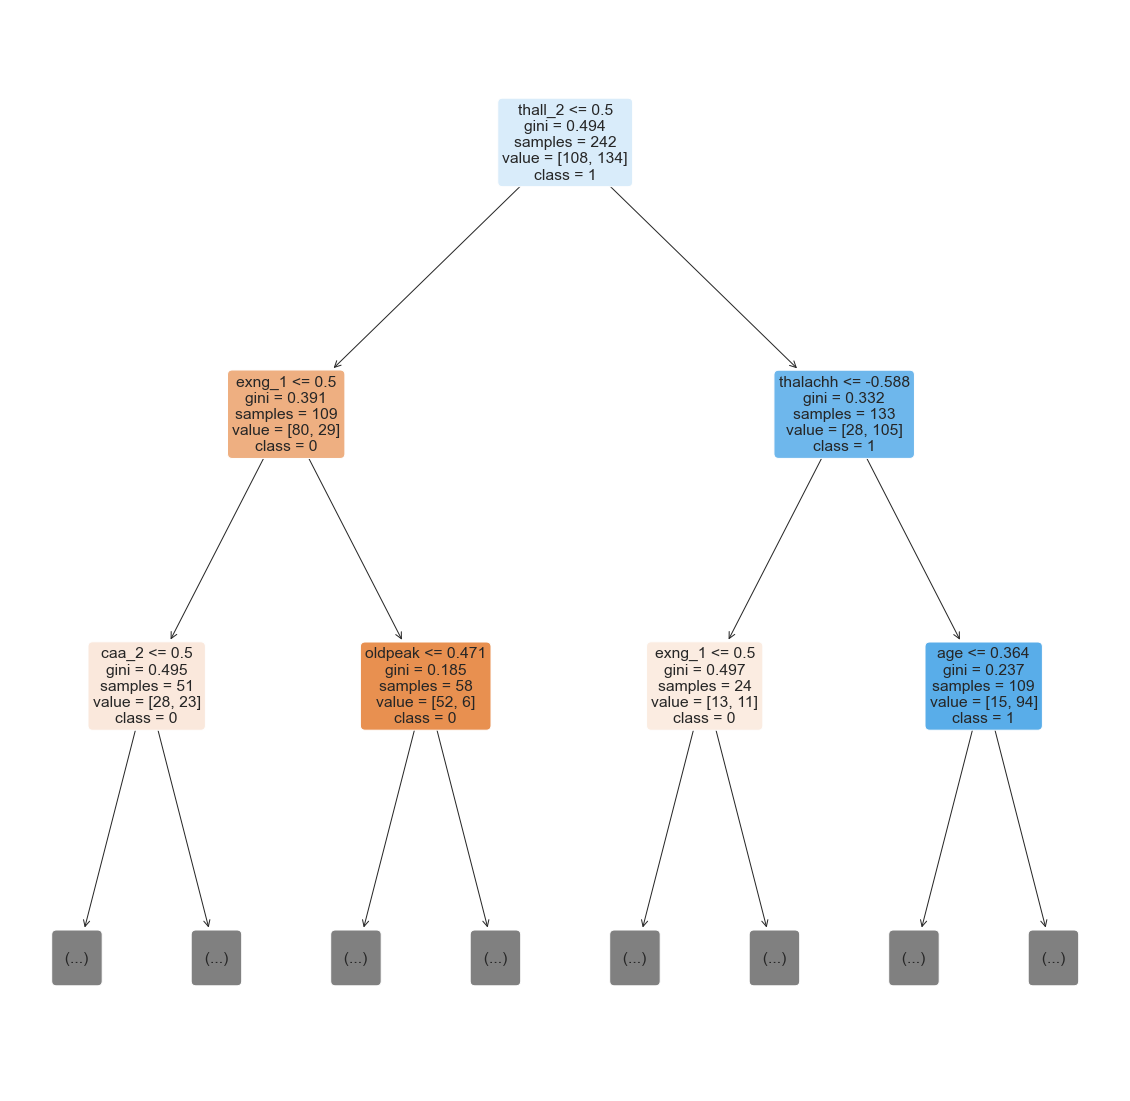

In [18]:
from sklearn.tree import plot_tree

sns.set(rc = {'figure.figsize' : (20, 20)})

# visualizing the first few steps of our final decision tree
plot_tree(classifier_DT, 
          feature_names = X_train.columns, 
          class_names = ['0', '1'], 
          max_depth = 2, 
          rounded = True, 
          filled = True)
plt.show()

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_DT)

0.7213114754098361

In [20]:
accuracy_score(y_test, y_pred_RF)

0.819672131147541

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_DT))
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70        30
           1       0.71      0.77      0.74        31

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        30
           1       0.79      0.87      0.83        31

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



The decision tree model is 72% accurate, and the random forest is 82% accurate. 

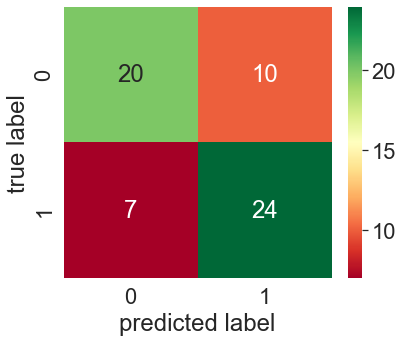

In [22]:
from sklearn.metrics import confusion_matrix

cm_DT = confusion_matrix(y_test, y_pred_DT)

sns.set(rc = {'figure.figsize' : (6, 5)})
sns.set(font_scale = 2) 
sns.heatmap(cm_DT, annot = True, cmap = 'RdYlGn')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

10 patients without heart disease were mislabeled as having it, and 7 patients with heart disease were mislabled as not. I think that it is worse to label a patient as not having heart disease when they actually do, because that is a more severe case. 

In [23]:
def f_imp(classifiers, X, y, bins):
    
    ''' A function for displaying feature importances'''
    
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    axes = axes.flatten()

    for ax, classifier in zip(axes, classifiers):

        try:
            classifier.fit(X, y)
            feature_imp = pd.DataFrame(sorted(
                zip(classifier.feature_importances_, X.columns)),
                                       columns=['Value', 'Feature'])

            sns.barplot(x="Value",
                        y="Feature",
                        data=feature_imp.sort_values(by="Value",
                                                     ascending=False),
                        ax=ax,
                        palette='plasma')
            plt.title('Features')
            plt.tight_layout()
            ax.set(title=f'{classifier.__class__.__name__} Feature Impotances')
            ax.xaxis.set_major_locator(MaxNLocator(nbins=bins))
        except:
            continue
    plt.show()

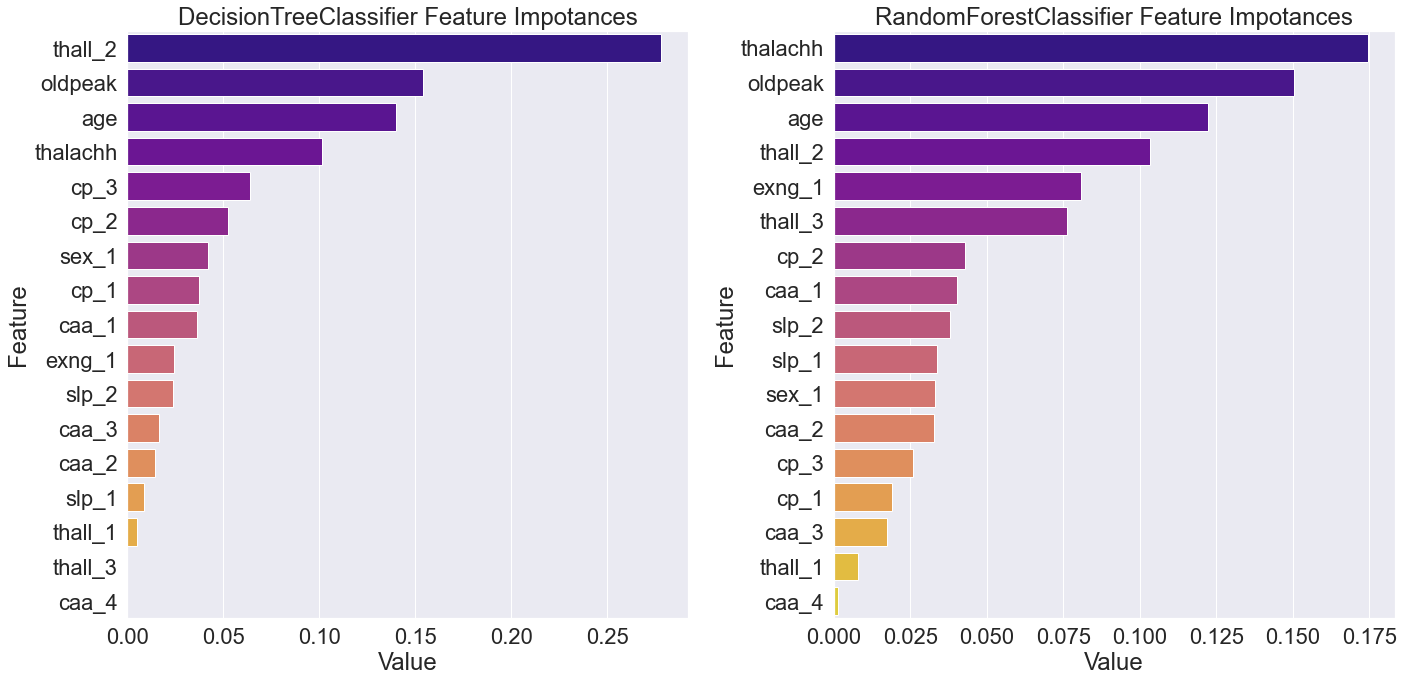

In [24]:
f_imp([classifier_DT, classifier_RF], X, y, 6)

Here we can visualize the priority of each attribute in our models. The decision tree model determined the 'thall_2' as the most important attribute, while the random forest model prioritized the 'thalachh' attribute. Now let's look at a logistic regression model.

## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

# creating the instance
classifier_LR = LogisticRegression(random_state = 32)
classifier_LR.fit(X_train, y_train)

LogisticRegression(random_state=32)

In [26]:
# making predictions

y_pred_LR = classifier_LR.predict(X_test)
results_LR = pd.DataFrame({'test' : y_test, 'prediction' : y_pred_LR})
results_LR.reset_index(drop = True, inplace = True)
results_LR

,test,prediction
0,1,0
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
56,0,0
57,1,1
58,0,0
59,1,1


In [27]:
accuracy_score(y_test, y_pred_LR)

0.8852459016393442

In [28]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88        30
           1       0.85      0.94      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



The accuracy is now 88%. (Note: My first trial, including all attributes, had an accuracy of 83%. By removing the two weakest correlations, this increased to 85%. Next, after the removal of the two next weakest correlations, we now have 88%. Any more removal lowered the accurary rate. This work is not shown in the final report).

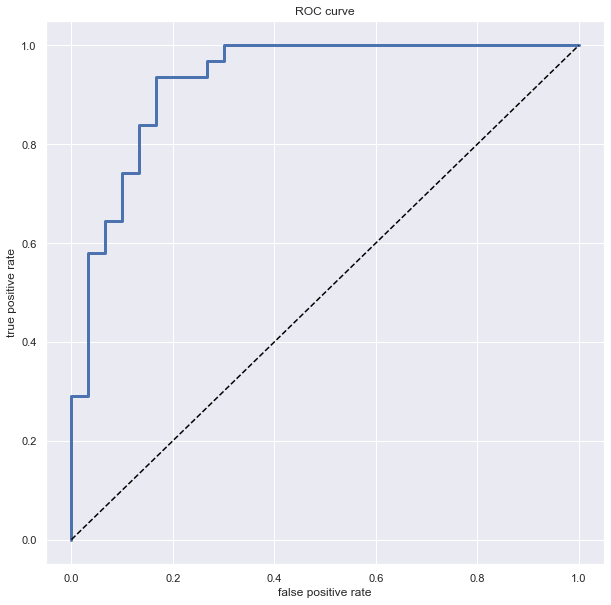

In [29]:
sns.set(rc = {'figure.figsize' : (10, 10)})

import sklearn.metrics as metrics

y_pred_proba = classifier_LR.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr, tpr, linewidth = 3)
plt.plot([0,1], [0,1], linestyle = 'dashed', color = 'black')

plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_LR)

0.8844086021505377

Here is the ROC curve. The area under the ROC curve is 0.884, and hugs the top left pretty well.

In [31]:
print('intercept: ', classifier_LR.intercept_[0])
print('classes: ', classifier_LR.classes_)
pd.DataFrame({'coeff' : classifier_LR.coef_[0], 
              'odds ratio' : np.exp(classifier_LR.coef_[0])},
             index = X_train.columns)

intercept:  1.530393352174311
classes:  [0 1]


,coeff,odds ratio
age,-0.044905,0.956088
thalachh,0.318945,1.375676
oldpeak,-0.398996,0.670993
sex_1,-1.070799,0.342734
cp_1,0.994674,2.703842
cp_2,1.057621,2.879513
cp_3,1.104619,3.018075
exng_1,-0.946202,0.388213
slp_1,-0.651490,0.521269
slp_2,0.100503,1.105727


This table shows the attributes used in the final logistic regression model and their cooresponding coefficients. The second column shows the odds ratio. For example, 'cp_3', or the presence of non-atypical angina chest pain, has a coefficientof 1.14, or a $e^{1.14} = $  3% increase in the probability of heart disease.

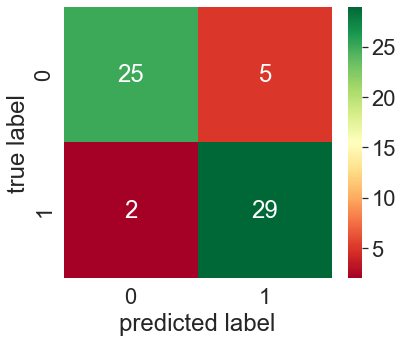

In [32]:
cm_LR = confusion_matrix(y_test, y_pred_LR)

sns.set(rc = {'figure.figsize' : (6, 5)})
sns.set(font_scale = 2) 
sns.heatmap(cm_LR, annot = True, cmap = 'RdYlGn')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

This model mislabeled five patients as having heart disease and two as not. This is an improvement over our previous model.